In [1]:
import intake
import dask.distributed as dsk

# Start client
clnt = dsk.Client()
clnt

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 7,Total memory: 256.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37793,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 7
Started: Just now,Total memory: 256.00 GiB
Comm: tcp://127.0.0.1:39553,Total threads: 1
Dashboard: /proxy/38063/status,Memory: 36.57 GiB
Nanny: tcp://127.0.0.1:44485,


In [2]:
data = intake.cat.nci

In [3]:
list(data)

['era5', 'era5_land', 'ecmwf', 'esgf', 'cosima', 'erai']

In [4]:
era5 = data.era5

In [5]:
list(era5)

['era5.pressure-levels.monthly-averaged',
 'era5.single-levels.monthly-averaged',
 'era5.pressure-levels.monthly-averaged-by-hour',
 'era5-1.pressure-levels.monthly-averaged-by-day',
 'era5-1.pressure-levels.monthly-averaged',
 'era5.single-levels.monthly-averaged-by-hour',
 'era5.single-levels.reanalysis',
 'era5-1.pressure-levels.reanalysis',
 'era5.pressure-levels.reanalysis']

In [6]:
era5.df.head()

,sub_collection,dataset,product_type,parameter,year,month,startdate,file_variable,path
0,era5-1,pressure-levels,monthly-averaged-by-day,cc,2000,1,20000101,cc,/g/data/rt52/era5-1/pressure-levels/monthly-av...
1,era5-1,pressure-levels,monthly-averaged-by-day,cc,2000,2,20000201,cc,/g/data/rt52/era5-1/pressure-levels/monthly-av...
2,era5-1,pressure-levels,monthly-averaged-by-day,cc,2000,3,20000301,cc,/g/data/rt52/era5-1/pressure-levels/monthly-av...
3,era5-1,pressure-levels,monthly-averaged-by-day,cc,2000,4,20000401,cc,/g/data/rt52/era5-1/pressure-levels/monthly-av...
4,era5-1,pressure-levels,monthly-averaged-by-day,cc,2000,5,20000501,cc,/g/data/rt52/era5-1/pressure-levels/monthly-av...


In [7]:
print(era5.unique()['sub_collection'])
print(era5.unique()['dataset'])
print(era5.unique()['product_type'])

{'count': 2, 'values': ['era5', 'era5-1']}
{'count': 2, 'values': ['single-levels', 'pressure-levels']}
{'count': 4, 'values': ['monthly-averaged', 'monthly-averaged-by-day', 'monthly-averaged-by-hour', 'reanalysis']}


In [8]:
sub = era5.search(sub_collection='era5',dataset='single-levels', product_type='reanalysis',
                  parameter='mtpr', year=[x for x in range(2010,2022)])

In [9]:
sub

,unique
sub_collection,1
dataset,1
product_type,1
parameter,1
year,12
month,12
startdate,144
file_variable,1
path,144


In [10]:
sub.df.head()

,sub_collection,dataset,product_type,parameter,year,month,startdate,file_variable,path
0,era5,single-levels,reanalysis,mtpr,2010,1,20100101,mtpr,/g/data/rt52/era5/single-levels/reanalysis/mtp...
1,era5,single-levels,reanalysis,mtpr,2010,2,20100201,mtpr,/g/data/rt52/era5/single-levels/reanalysis/mtp...
2,era5,single-levels,reanalysis,mtpr,2010,3,20100301,mtpr,/g/data/rt52/era5/single-levels/reanalysis/mtp...
3,era5,single-levels,reanalysis,mtpr,2010,4,20100401,mtpr,/g/data/rt52/era5/single-levels/reanalysis/mtp...
4,era5,single-levels,reanalysis,mtpr,2010,5,20100501,mtpr,/g/data/rt52/era5/single-levels/reanalysis/mtp...


In [11]:
ds_dict = sub.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'sub_collection.dataset.product_type'


In [12]:
ds_dict.keys()

dict_keys(['era5.single-levels.reanalysis'])

In [13]:
ds = ds_dict['era5.single-levels.reanalysis']

In [14]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 105192)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2010-01-01 ... 2021-12-31T23:00:00
Data variables:
    mtpr       (time, latitude, longitude) float32 dask.array<chunksize=(744, 721, 1440), meta=np.ndarray>
Attributes:
    intake_esm_varname:      ['mtpr']
    Conventions:             CF-1.6
    history:                 2020-10-06 09:14:14 UTC+1100 by era5_replication...
    license:                 Licence to use Copernicus Products: https://apps...
    summary:                 ERA5 is the fifth generation ECMWF atmospheric r...
    intake_esm_dataset_key:  era5.single-levels.reanalysis

In [15]:
myregion = ds.sel(latitude=slice(75,-65),longitude=slice(-180,180))

In [16]:
myregion

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 561, time: 105192)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 75.0 74.75 74.5 74.25 ... -64.5 -64.75 -65.0
  * time       (time) datetime64[ns] 2010-01-01 ... 2021-12-31T23:00:00
Data variables:
    mtpr       (time, latitude, longitude) float32 dask.array<chunksize=(744, 561, 1440), meta=np.ndarray>
Attributes:
    intake_esm_varname:      ['mtpr']
    Conventions:             CF-1.6
    history:                 2020-10-06 09:14:14 UTC+1100 by era5_replication...
    license:                 Licence to use Copernicus Products: https://apps...
    summary:                 ERA5 is the fifth generation ECMWF atmospheric r...
    intake_esm_dataset_key:  era5.single-levels.reanalysis

In [17]:
#mtpr = myregion['mtpr']
mtpr = myregion

In [18]:
mtpr = mtpr.resample(time = '1D').mean('time')

In [19]:
mtpr = mtpr.chunk(chunks = {'time': '200MB'})
mtpr

<xarray.Dataset>
Dimensions:    (time: 4383, longitude: 1440, latitude: 561)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2021-12-31
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 75.0 74.75 74.5 74.25 ... -64.5 -64.75 -65.0
Data variables:
    mtpr       (time, latitude, longitude) float32 dask.array<chunksize=(61, 561, 1440), meta=np.ndarray>

In [20]:
from dask.diagnostics import ProgressBar

In [21]:
encoding = {
    'mtpr': {
        'shuffle': True,
        'chunksizes': [31, 31, 31],
        'zlib': True,
        'complevel': 5
    }
}

In [ ]:
comp = dict(shuffle=True, chunksizes=[31, 31, 31], zlib=True, complevel=5)
encoding = {var: comp for var in mtpr.data_vars}

In [22]:
delayed_save = mtpr['mtpr'].to_netcdf('/g/data/w40/sg7549/ERA5_stuff/mean_rainfall_mtpr_2010-2022.nc', encoding=encoding, compute=False)

In [23]:
with ProgressBar():
    results = delayed_save.compute()

In [ ]:
#mtpr.to_netcdf('/g/data/w40/sg7549/ERA5_stuff/mean_rainfall_mtpr_2011.nc', encoding=encoding)

In [25]:
import xarray as xr

In [33]:
data = xr.open_mfdataset('/g/data/w40/sg7549/ERA5_stuff/mean_rainfall_mtpr_2010-2022.nc', chunks = {'time': '200MB'})

In [34]:
data

<xarray.Dataset>
Dimensions:    (time: 4383, longitude: 1440, latitude: 561)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2021-12-31
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 75.0 74.75 74.5 74.25 ... -64.5 -64.75 -65.0
Data variables:
    mtpr       (time, latitude, longitude) float32 dask.array<chunksize=(61, 561, 1440), meta=np.ndarray>

In [35]:
# Plotting libraries
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cmocean as cm
import matplotlib.pyplot as plt

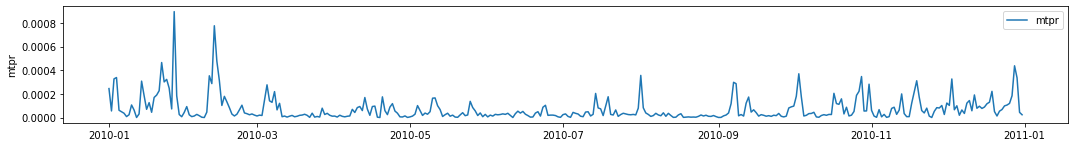

In [47]:
fig = plt.figure(figsize=(18,15))
axs = [fig.add_subplot(611)]
n = 0
axs[n].plot(data['time'][:365], data['mtpr'][:365, 360, 50], label = 'mtpr')
axs[n].set_ylabel('mtpr')
plt.legend()

In [44]:
data['time'][:31]

<xarray.DataArray 'time' (time: 31)>
array(['2010-01-01T00:00:00.000000000', '2010-01-02T00:00:00.000000000',
       '2010-01-03T00:00:00.000000000', '2010-01-04T00:00:00.000000000',
       '2010-01-05T00:00:00.000000000', '2010-01-06T00:00:00.000000000',
       '2010-01-07T00:00:00.000000000', '2010-01-08T00:00:00.000000000',
       '2010-01-09T00:00:00.000000000', '2010-01-10T00:00:00.000000000',
       '2010-01-11T00:00:00.000000000', '2010-01-12T00:00:00.000000000',
       '2010-01-13T00:00:00.000000000', '2010-01-14T00:00:00.000000000',
       '2010-01-15T00:00:00.000000000', '2010-01-16T00:00:00.000000000',
       '2010-01-17T00:00:00.000000000', '2010-01-18T00:00:00.000000000',
       '2010-01-19T00:00:00.000000000', '2010-01-20T00:00:00.000000000',
       '2010-01-21T00:00:00.000000000', '2010-01-22T00:00:00.000000000',
       '2010-01-23T00:00:00.000000000', '2010-01-24T00:00:00.000000000',
       '2010-01-25T00:00:00.000000000', '2010-01-26T00:00:00.000000000',
       '2010-01-27T00:00:00.000000000', '2010-01-28T00:00:00.000000000',
       '2010-01-29T00:00:00.000000000', '2010-01-30T00:00:00.000000000',
       '2010-01-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-01-31

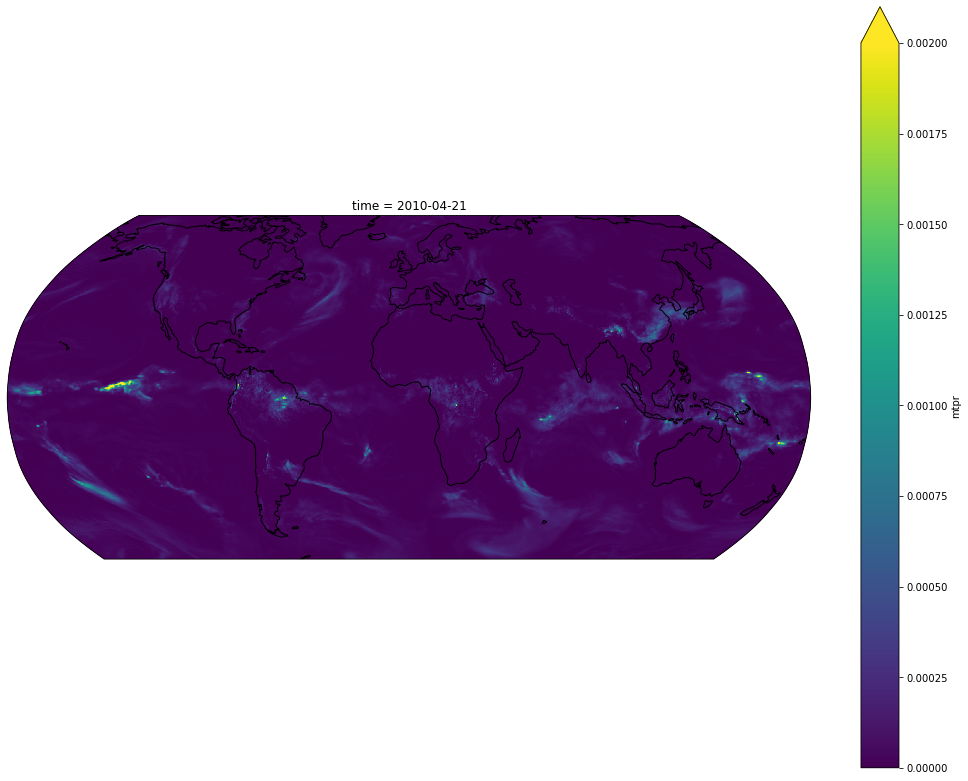

In [60]:
plt.figure(figsize=(18, 14))
ax = plt.axes(projection=ccrs.Robinson())

data['mtpr'][110, :, :].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap="viridis", vmin=0, vmax=0.002)

ax.coastlines();
plt.show()